<a href="https://colab.research.google.com/github/nasif-raihan/ML-and-DL-Codes/blob/main/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Data source](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* [Blog](https://www.analyticsvidhya.com/blog/2021/05/develop-your-first-deep-learning-model-in-python-with-keras/)
* [Followed Notebook](https://www.kaggle.com/harshjain123/diabetes-eda-model)

**1. Import Library and Load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Pima Indians Diabetes Database/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Descriptive statistics of data**

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we notice there are no NULL but some zero (0) values in columns Glucose, BP, Skin thickness, Insulin, BMI which should not be zero. So, treating them as missing values, we need to impute values in those columns in order to handle it.

**3. Handle Columns with value '0' (Missing value treatment)**

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
features = data.columns

col = (data[features] == 0).sum()

col

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

let's replace the zero(0) values of columns Glucose, BP, Skin thickness, Insulin, BMI to NaN

In [ ]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

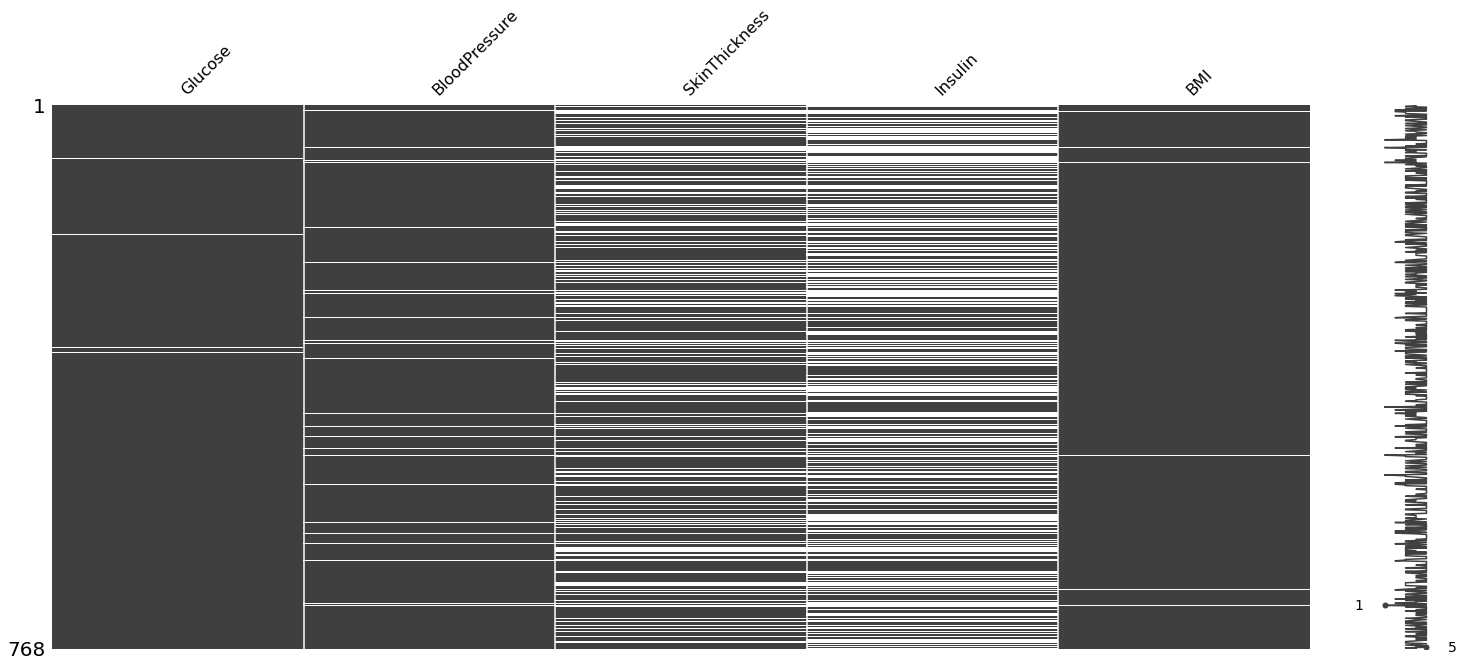

In [ ]:
msno.matrix(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']])

**3.1 Handle: Glucose, BP, BMI**

In [ ]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace= True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['BMI'].fillna(data['BMI'].mean(), inplace = True)

**3.2 Handle: Insulin based on Glucose**


Note. After you eat, your blood sugar (glucose) rises. This rise in glucose triggers your pancreas to release insulin into the bloodstream. Insulin travels through the blood to your body's cells. It tells the cells to open up and let the glucose in.

***So, clearly we can assume insulin level from the Glucose measurement.***


In [ ]:
glucose_insulin = data.groupby(['Glucose'])

def fill_insulin(series):
  return series.fillna(series.mean())


data['Insulin'] = glucose_insulin['Insulin'].transform(fill_insulin)

data['Insulin'].isnull().sum()

32

We see, yet 32 NaN value is present!

In [ ]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())
data['Insulin'].isnull().sum()

0

**3.3 Skin thickness based on BMI**

Note. In case of both children and adults, skin layers became progressively thicker with increasing BMI.

***So, clearly we can assume Skin thickness level from the BMI measurement.***

In [ ]:
bmi_skin = data.groupby(data['BMI'])

def fill_skinthickness(series):
  return series.fillna(series.mean())

data['SkinThickness'] = bmi_skin['SkinThickness'].transform(fill_skinthickness)

data['SkinThickness'].isnull().sum()

32

We see, yet 32 NaN value is present!

In [ ]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)

data['SkinThickness'].isnull().sum()

0

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**4.1 Visualization of the target variable**

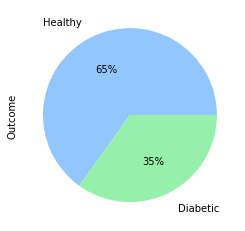

In [ ]:
plt.style.use('seaborn-pastel')

labels = ["Healthy", "Diabetic"]

data['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(4,4))

plt.show()

Samples of diabetic people:  268
Samples of healthy people:   500


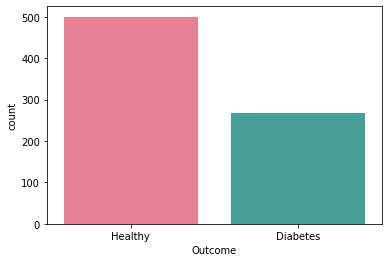

In [ ]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x=data['Outcome'], data = data, palette='husl')
ax.set_xticklabels(['Healthy', 'Diabetes'])

healthy, diabetes = data['Outcome'].value_counts()  #.values

print("Samples of diabetic people: ", diabetes)
print("Samples of healthy people:  ", healthy)

**4.2 Distribution of other features w.r.t. Target variable**

* **countplot() :** can be thought of as a histogram across a categorical, instead of quantitative, variable.
* **distplot() :** flexibly plot a univariate distribution of observations.

In [ ]:
def distplot(feature):
  plt.figure(figsize = (20, 3))
  plt.title(feature)
  sns.distplot(data[feature][data['Outcome'] == 1], color = 'red', rug = True)
  sns.distplot(data[feature][data['Outcome'] == 0], color = 'green', rug = True)
  plt.legend(['Diabetes', 'No Diabetes'])
  plt.show()

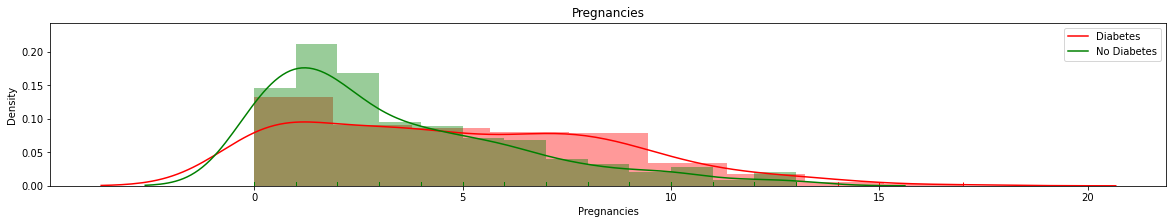

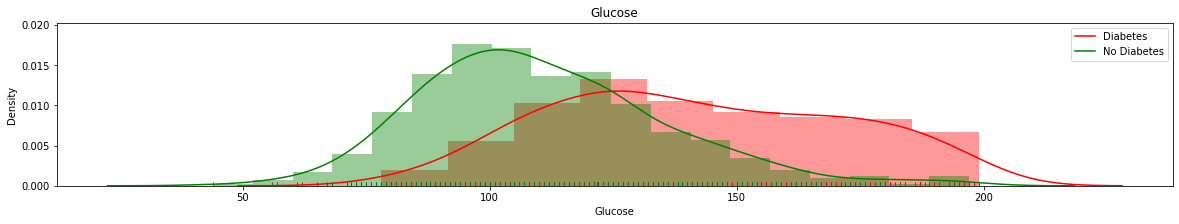

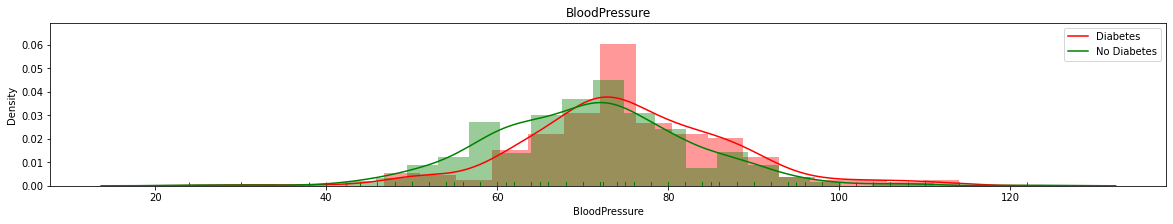

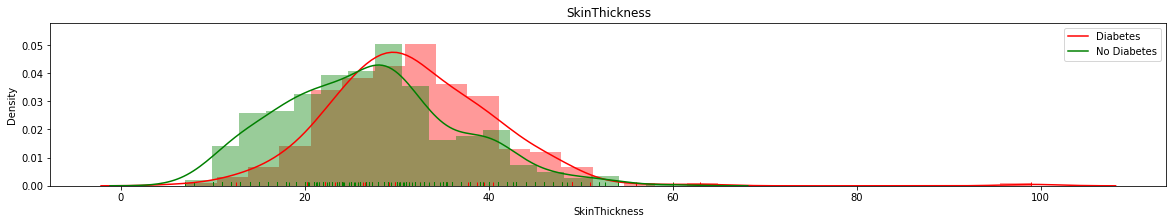

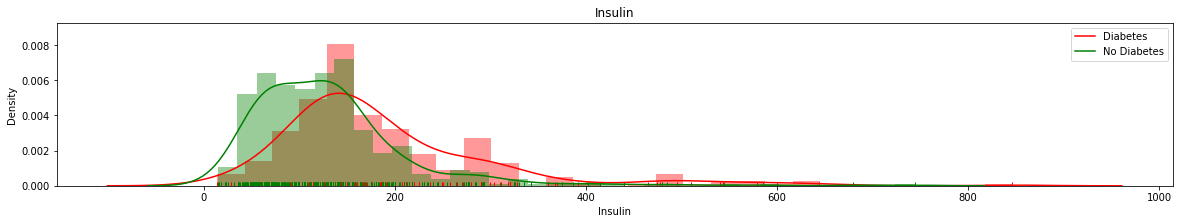

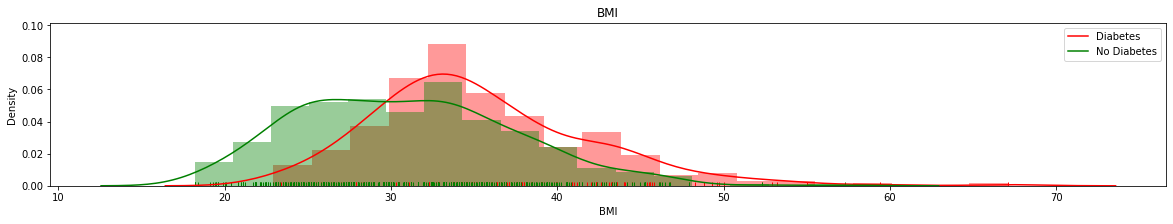

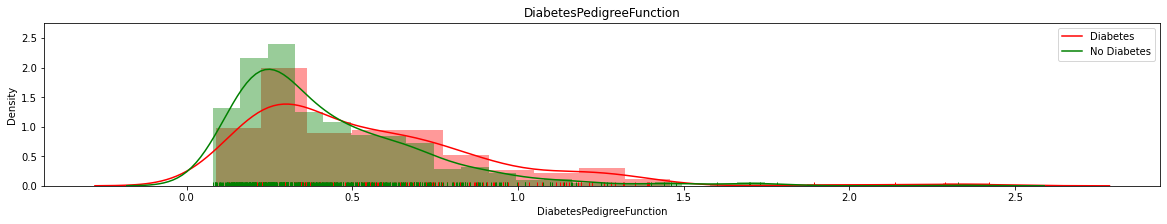

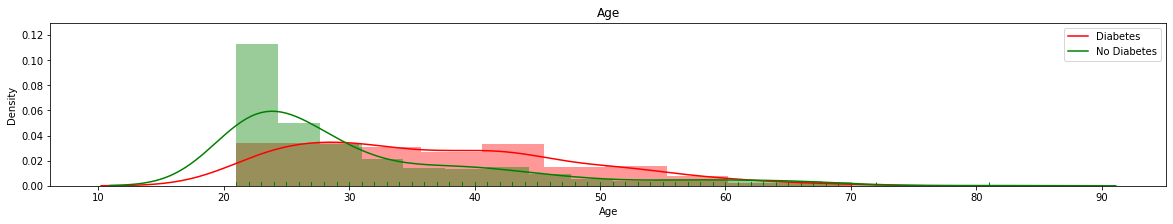

In [ ]:
for i in range(len(data.columns)-1):
  distplot(data.columns[i])

In [ ]:
def countplot(feature):
  plt.figure(figsize = (20, 3))
  plt.title(feature)
  sns.countplot(data[feature][data['Outcome'] == 1], color = 'blue')
  sns.countplot(data[feature][data['Outcome'] == 0], color = 'yellow')
  plt.legend(['Diabetes', 'No Diabetes'])
  plt.show()

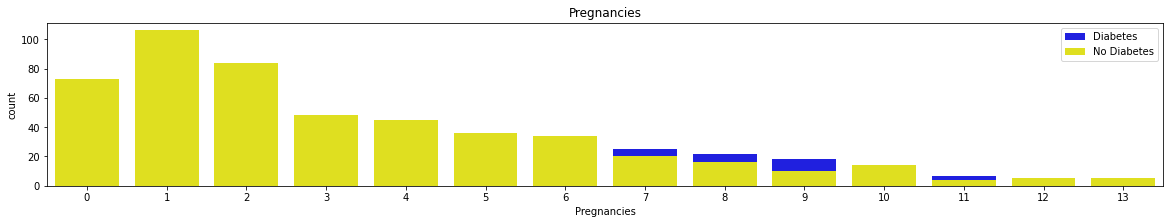

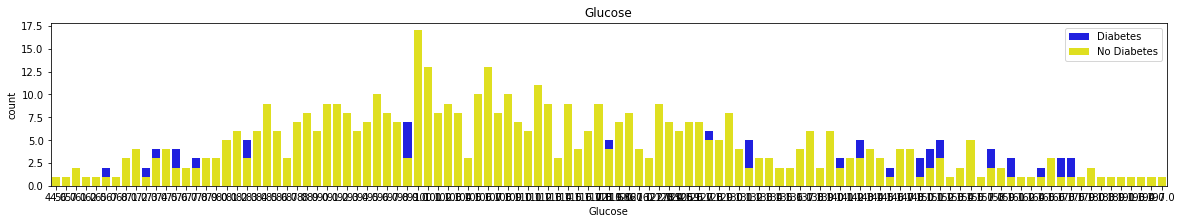

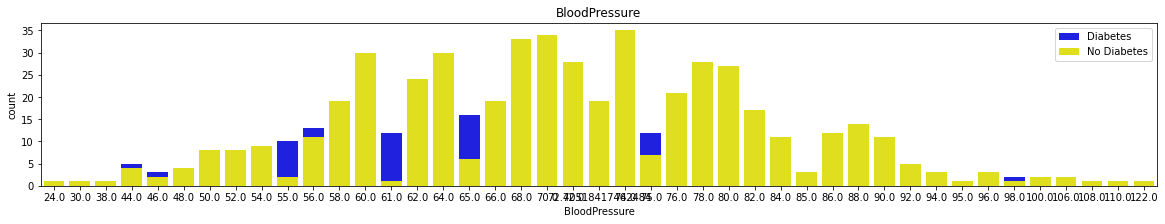

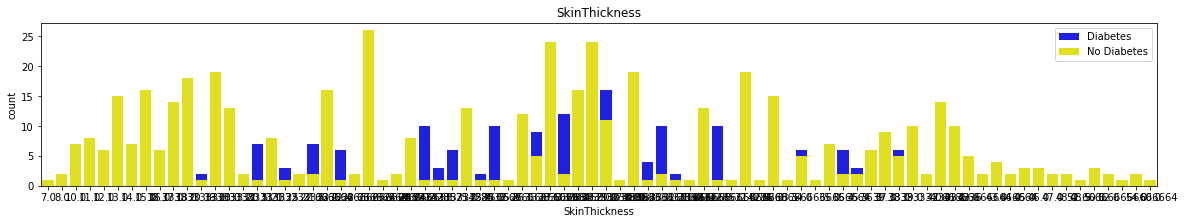

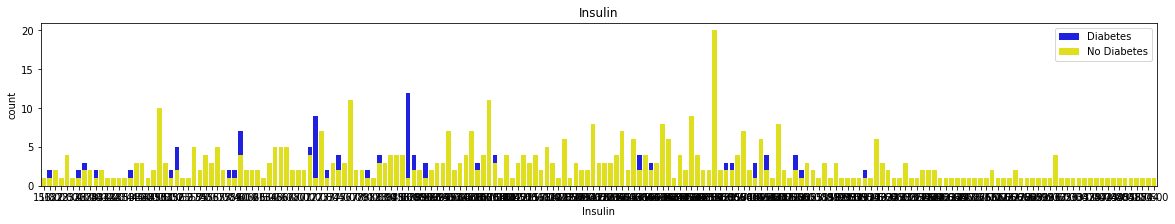

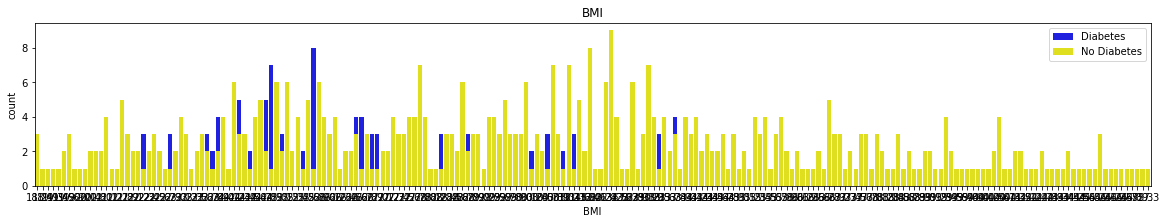

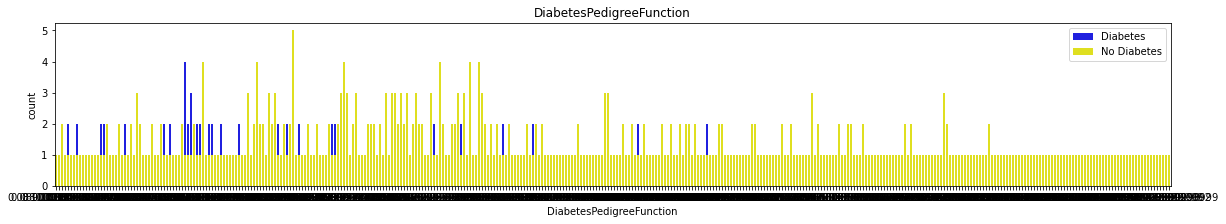

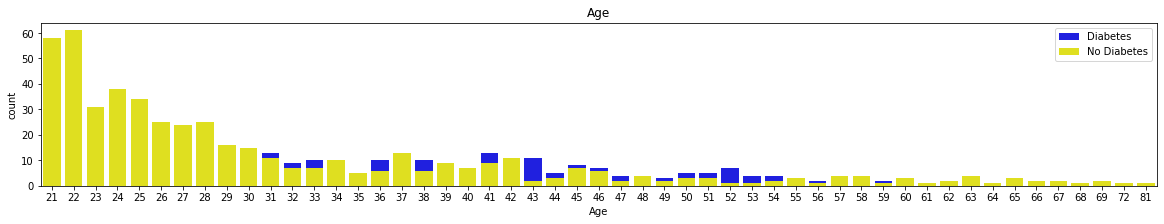

In [ ]:
for i in range(len(data.columns)-1):
  countplot(data.columns[i])

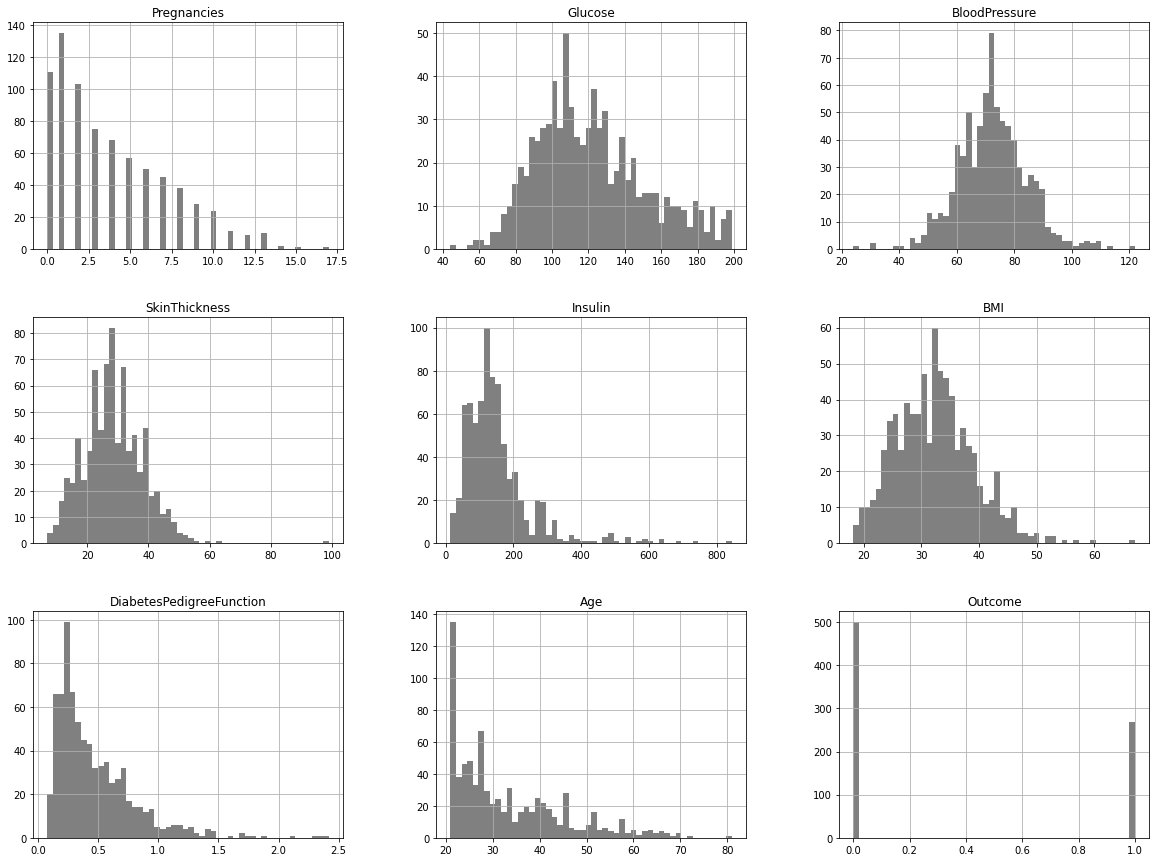

In [ ]:
data.hist(bins=50, figsize=(20, 15), color='grey')
plt.show()

**5. Checking the outliers**

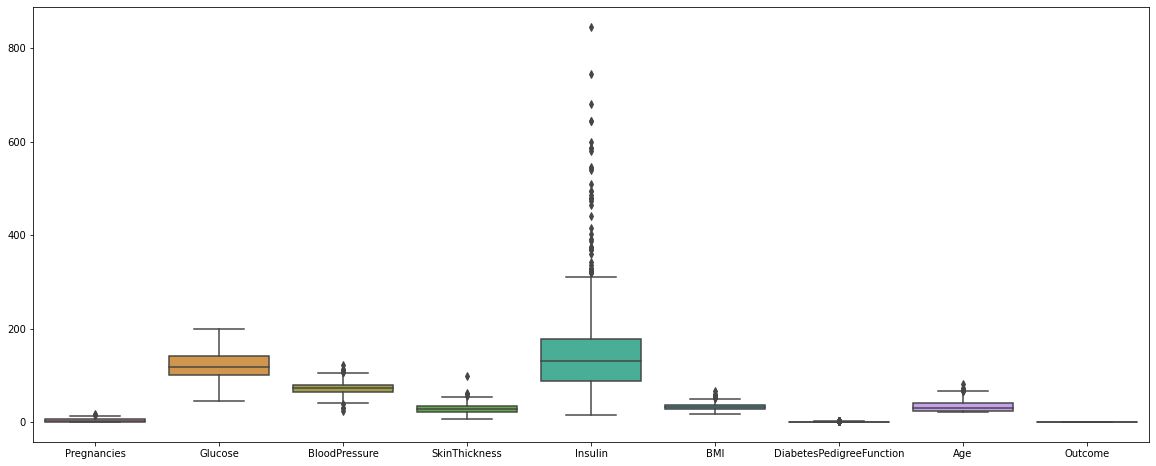

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = data)
plt.show()

**6. Correlation Matrix and Pair Plot**

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.063060,0.050229,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.191284,0.560942,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.182105,0.131597,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.063060,0.191284,0.182105,1.000000,0.201061,0.635932,0.130418,0.108252,0.234055
Insulin,0.050229,0.560942,0.131597,0.201061,1.000000,0.189775,0.113804,0.190803,0.280714
BMI,0.021565,0.230941,0.281268,0.635932,0.189775,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.130418,0.113804,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.108252,0.190803,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.234055,0.280714,0.311924,0.173844,0.238356,1.000000


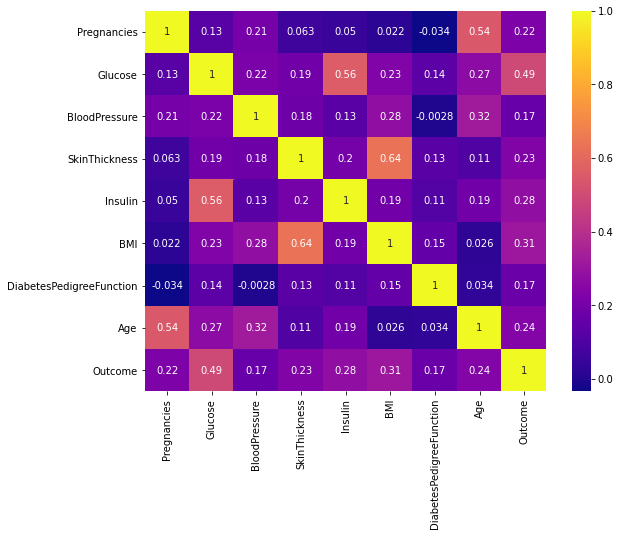

In [ ]:
plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'plasma')
plt.show()

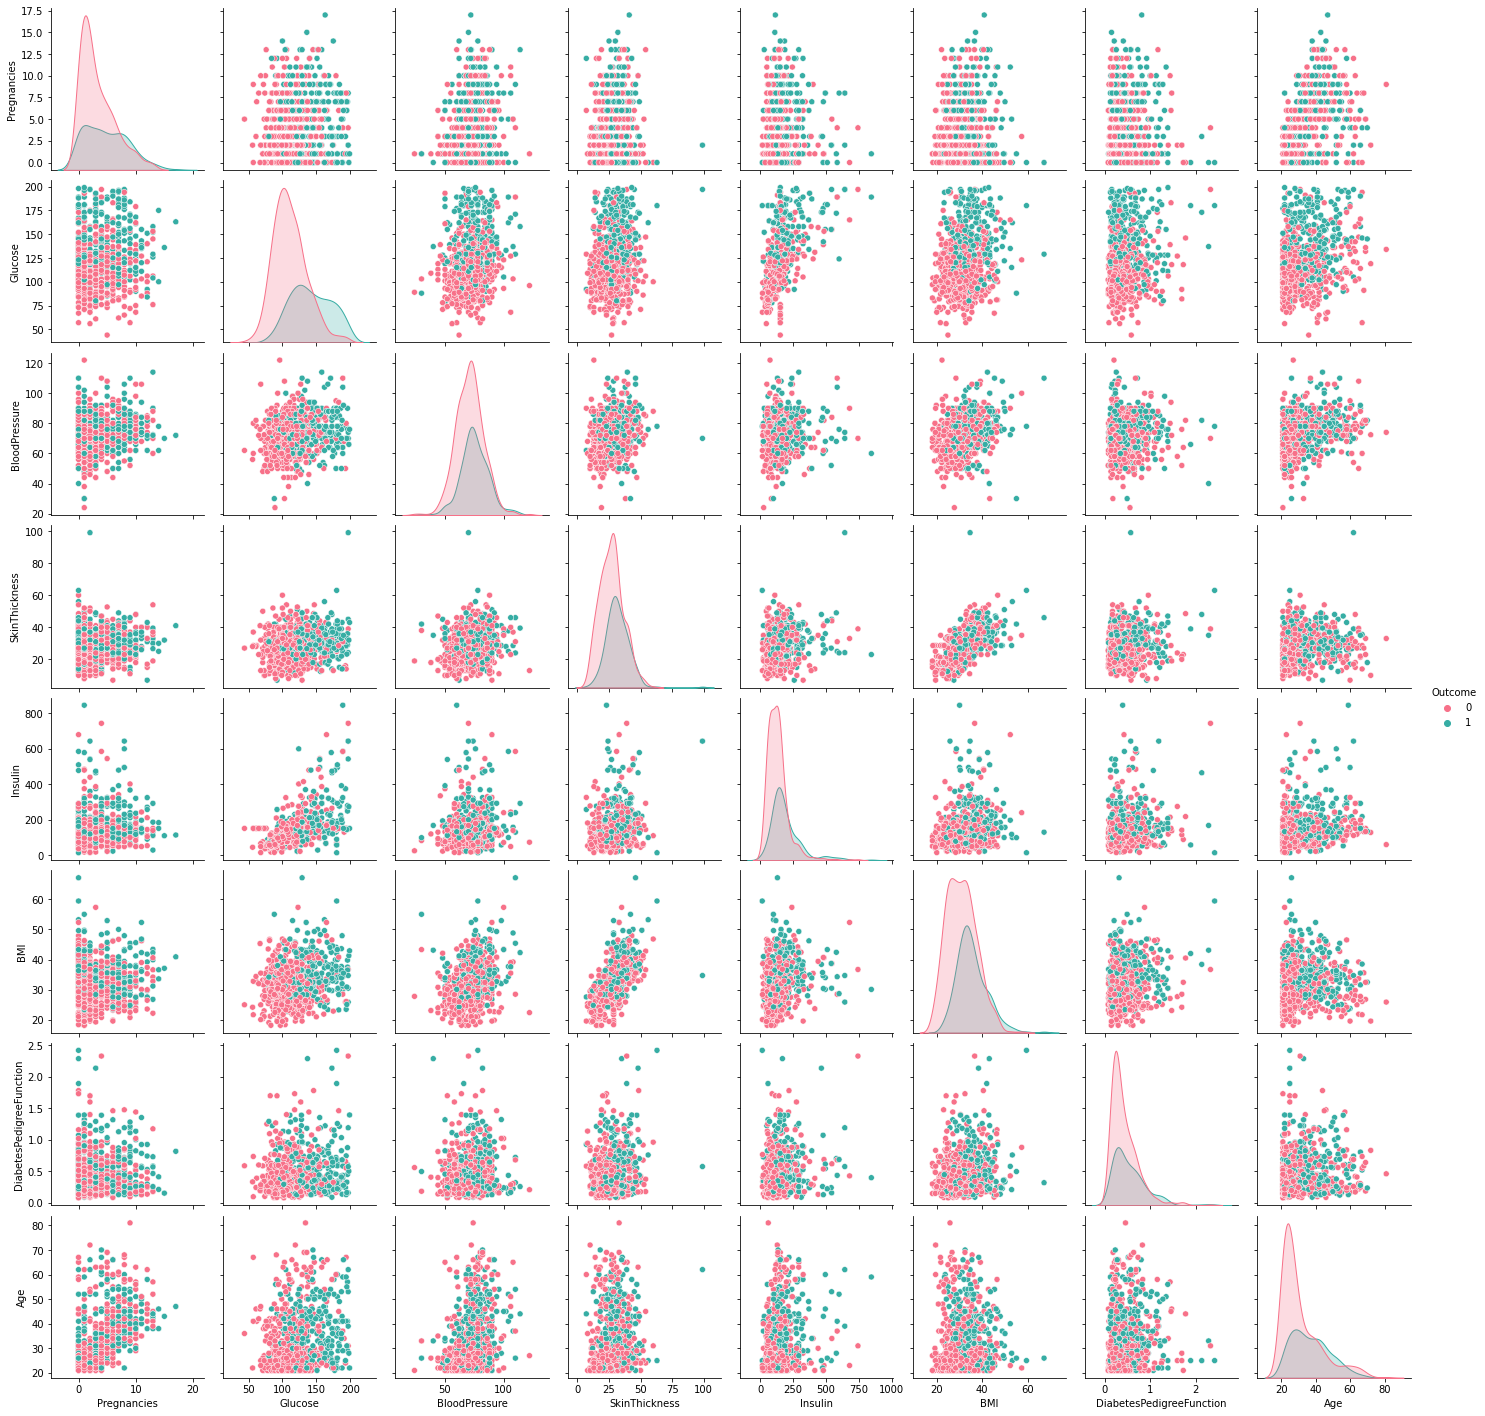

In [ ]:
sns.pairplot(data, hue = 'Outcome', palette='husl')
plt.show()

**7. Model Building**

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X.shape, y.shape

**7.1 Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((614, 8), (614,)), ((154, 8), (154,)))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, auc

**7.2 SVM Model**

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



**ROC (Reciever Operations Characteristics) Curve:**
* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

* ROC curves are appropriate when the observations are balanced between each class.

* ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

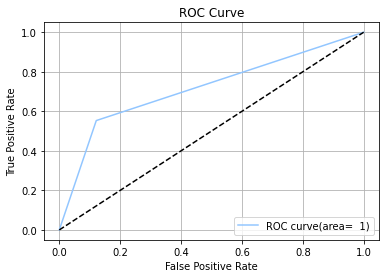

In [ ]:
def ROC():
  #fpr = false positive rate 
  #tpr = true positive rate
  fpr, tpr, _ = roc_curve(y_test, y_pred)  
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve(area= %2.f)' %roc_auc) 
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

ROC()

**7.3 Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy Score:  0.8051948051948052
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



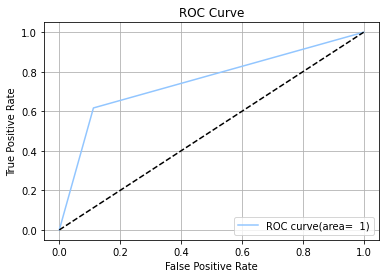

In [ ]:
ROC()

**7.4 KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy Score:  0.7272727272727273 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.56      0.49      0.52        47

    accuracy                           0.73       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.72      0.73      0.72       154



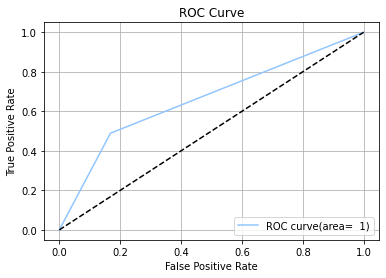

In [ ]:
ROC()

**8. Bulid Model using Keras**

In [41]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8502
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8567
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8485
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8550
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8632
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8534
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8583
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8518
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8534
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8518
Epoch 11/

In [57]:
_, accuracy = model.evaluate(X_train, y_train)
print("Model accuracy :", (accuracy*100))
_

20/20 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8974
Model accuracy : 89.73941206932068


0.2577389180660248

In [58]:
y_pred = model.predict(X_test)
print([round(x[0]) for x in y_pred])

print('\nAccuracy Score: ', accuracy_score(y_test, ([round(x[0]) for x in y_pred])))

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Accuracy Score:  0.7857142857142857
